# Lab 2

Author: Ryan Rosiak [rrosiak1@gulls.salisbury.edu]

Date: 9/10/20

Description: Starting OOP and basic graph visualization

In [59]:
from math import sqrt # sqrt Function
from typing import List, Tuple # List/Tuple type hinting
from matplotlib import pyplot as plt # Plotting object

In [60]:
# Vector Class
class Vector:
    def __init__(self, x: int, y: int):
        """Initialize with 2 integer values"""
        self.x = x
        self.y = y
    
    def __repr__(self):
        """toString"""
        return f"Vector x-point: {self.x} - y-point: {self.y}"
    
    def __eq__(self, other):
        """Overloaded == operator"""
        if self.x == other.x and self.y == other.y:
            return True
        return False
        
    def __add__(self, other):
        """Takes another Vector object, returns a Vector"""
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)
    
    def __sub__(self, other):
        """Takes another Vector object, returns a Vector"""
        x = self.x - other.x
        y = self.y - other.y
        return Vector(x, y)
    
    def __mul__(self, other) -> int:
        """Takes another Vector object, returns an int"""
        return self.x * other.x + self.y * other.y
    
    def distance_between(self, second_vector) -> float:
        """Takes another Vector object, returns a float"""
        return sqrt((self.x - second_vector.x)**2 + (self.y - second_vector.y)**2)

In [61]:
first = Vector(1, 10)
second = Vector(3, 5)
print(first, second)

Vector x-point: 1 - y-point: 10 Vector x-point: 3 - y-point: 5


In [62]:
added = first + second
print(f"X coordinate of addition: {added.x} Y coordinate of addition: {added.y}")

X coordinate of addition: 4 Y coordinate of addition: 15


In [63]:
subtracted = first - second
print(f"X coordinate of subtraction: {subtracted.x} Y coordinate of subtraction: {subtracted.y}")

X coordinate of subtraction: -2 Y coordinate of subtraction: 5


In [64]:
dot = first * second
print(f"Dot product of first and second: {dot}")

Dot product of first and second: 53


In [65]:
distance = first.distance_between(second)
print(f"The l2 norm distance between the first and second {distance}")

The l2 norm distance between the first and second 5.385164807134504


In [75]:
# Geometry Function
class Geometry:
    def __init__(self, vertices: List[Vector], pair_vertices: List[Tuple[Vector, Vector]]):
        """Initializes the Geometry class with list of Vectors and a list of Tuple paired Vectors"""
        self.vertices = vertices
        self.pair_vertices = pair_vertices
        
    def __repr__(self):
        """toString"""
        return f"List of vertices: {self.vertices} List of Pairs (faces): {self.pair_vertices}"
    
    def add_face(self, vec1: Vector, vec2: Vector):
        """Adds each vector to the vector list(if they are not already there) and
        then adds a connection between them (if it does not exist already)"""
        if vec1 in self.vertices:
            print(f"{vec1} is already in the vector list")
        else:
            self.vertices.append(vec1)
        if vec2 in self.vertices:
            print(f"{vec2} is already in the vector list")
        else:
            self.vertices.append(vec2)
            
        for i in self.pair_vertices:
            if (vec1, vec2) == i or (vec2, vec1) == i:
                print("Vector pair is already in the list")
                return
        
        self.pair_vertices.append((vec1, vec2))
        
    def is_closed(self) -> bool:
        """Checks to see if the shape that is currently in the Geometry class is 
        closed or not"""
        if self.pair_vertices == []:
            print("There is no shape currently")
            return False
        
        if len(self.pair_vertices) <= 2:
            return False
        
        for i in range(len(self.pair_vertices)):
            point1 = self.pair_vertices[i][0]
            point2 = self.pair_vertices[i][1]
            connected_points = [j for i in self.pair_vertices if i != (point1, point2) for j in i if point1 == j or point2 == j]
            if (len(connected_points) != 2):
                return False;
            
        return True
    
    def draw(self):
        """Draws the shape to the screen in a graph using matplotlib"""
        x = []
        y = []
        for i in self.pair_vertices:
            x.append(i[0].x)
            x.append(i[1].x)
            y.append(i[0].y)
            y.append(i[1].y)

        plt.plot(x, y, linewidth="3")
        plt.title("Current Shape")
        plt.xlabel("X Axis")
        plt.ylabel("Y Axis")
        plt.show()\
        
    def is_inside(self, point: Vector) -> bool:
        """Determines if a line is inside the shape/passing through a face"""
        
        if self.pair_vertices == []:
            print("There is no shape currently")
            return False
        
        if (not self.is_closed()):
            print("Point cannot be 'inside' a closed shape.")
            return False
        
        yline = point.y
        xline = point.x
        
        crossCount = 0
        onPoint = False
        for i in self.pair_vertices:
            if xline > i[0].x and xline > i[1].x:
                continue
            point1y = i[0].y
            point2y = i[1].y
            if (point1y == yline or point2y == yline) and not onPoint:
                onPoint = True
                crossCount += 1
            if point1y > point2y:
                if yline <= point1y and yline >= point2y:
                    crossCount += 1
            elif point1y < point2y:
                if yline >= point1y and yline <= point2y:
                    crossCount += 1
            else:
                if yline == point1y:
                    crossCount += 1
                    
        if crossCount % 2 == 0:
            return False
        else:
            return True
        

Testing add_face function while using the matplotlib print
Adding some vectors to the Geometry class
Empty Geometry class
List of vertices: [] List of Pairs (faces): []
Shape G
Vector x-point: 1 - y-point: 2 is already in the vector list
Vector x-point: 5 - y-point: 5 is already in the vector list
Vector x-point: 9 - y-point: 3 is already in the vector list
List of vertices: [Vector x-point: 1 - y-point: 2, Vector x-point: 5 - y-point: 5, Vector x-point: 9 - y-point: 3] List of Pairs (faces): [(Vector x-point: 1 - y-point: 2, Vector x-point: 5 - y-point: 5), (Vector x-point: 1 - y-point: 2, Vector x-point: 9 - y-point: 3), (Vector x-point: 5 - y-point: 5, Vector x-point: 9 - y-point: 3)]


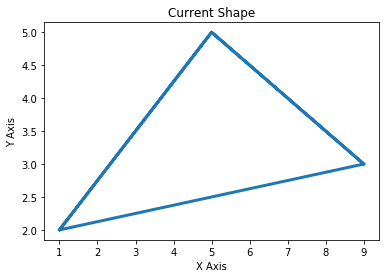

Is g closed? True
Shape F
Vector x-point: 5 - y-point: 5 is already in the vector list
Vector x-point: 9 - y-point: 3 is already in the vector list
List of vertices: [Vector x-point: 1 - y-point: 2, Vector x-point: 5 - y-point: 5, Vector x-point: 1 - y-point: 4, Vector x-point: 9 - y-point: 3] List of Pairs (faces): [(Vector x-point: 1 - y-point: 2, Vector x-point: 5 - y-point: 5), (Vector x-point: 1 - y-point: 4, Vector x-point: 9 - y-point: 3), (Vector x-point: 5 - y-point: 5, Vector x-point: 9 - y-point: 3)]


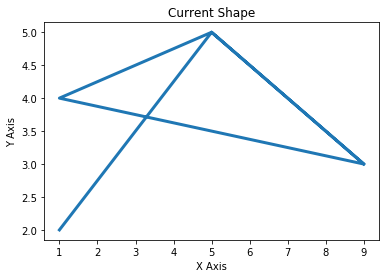

Is f closed? False
Shape J
Vector x-point: 10 - y-point: 2 is already in the vector list
Vector x-point: 10 - y-point: 10 is already in the vector list
Vector x-point: 1 - y-point: 2 is already in the vector list
Vector x-point: 1 - y-point: 10 is already in the vector list
List of vertices: [Vector x-point: 1 - y-point: 2, Vector x-point: 10 - y-point: 2, Vector x-point: 10 - y-point: 10, Vector x-point: 1 - y-point: 10] List of Pairs (faces): [(Vector x-point: 1 - y-point: 2, Vector x-point: 10 - y-point: 2), (Vector x-point: 10 - y-point: 2, Vector x-point: 10 - y-point: 10), (Vector x-point: 10 - y-point: 10, Vector x-point: 1 - y-point: 10), (Vector x-point: 1 - y-point: 2, Vector x-point: 1 - y-point: 10)]


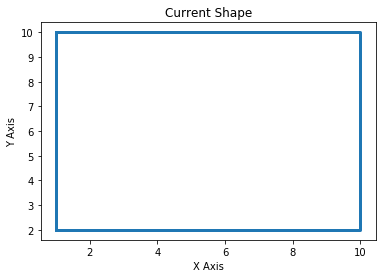

Is j closed? True
Shape S
Vector x-point: 8 - y-point: 10 is already in the vector list
Vector x-point: 10 - y-point: 8 is already in the vector list
Vector x-point: 10 - y-point: 6 is already in the vector list
Vector x-point: 8 - y-point: 4 is already in the vector list
Vector x-point: 6 - y-point: 4 is already in the vector list
Vector x-point: 4 - y-point: 6 is already in the vector list
Vector x-point: 4 - y-point: 8 is already in the vector list
Vector x-point: 6 - y-point: 10 is already in the vector list
List of vertices: [Vector x-point: 6 - y-point: 10, Vector x-point: 8 - y-point: 10, Vector x-point: 10 - y-point: 8, Vector x-point: 10 - y-point: 6, Vector x-point: 8 - y-point: 4, Vector x-point: 6 - y-point: 4, Vector x-point: 4 - y-point: 6, Vector x-point: 4 - y-point: 8] List of Pairs (faces): [(Vector x-point: 6 - y-point: 10, Vector x-point: 8 - y-point: 10), (Vector x-point: 8 - y-point: 10, Vector x-point: 10 - y-point: 8), (Vector x-point: 10 - y-point: 8, Vector x-

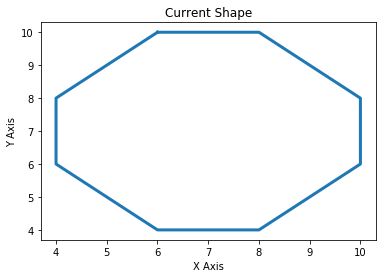

Is s closed? True


In [76]:
print("Testing add_face function while using the matplotlib print")
print("Adding some vectors to the Geometry class")
g = Geometry([], [])
print("Empty Geometry class")
print(g)
print("Shape G")
g.add_face(Vector(1,2), Vector(5,5))
g.add_face(Vector(1,2), Vector(9,3))
g.add_face(Vector(5,5), Vector(9,3))
print(g)
g.draw()
print(f"Is g closed? {g.is_closed()}")
print("Shape F")
f = Geometry([], [])
f.add_face(Vector(1,2), Vector(5,5))
f.add_face(Vector(1,4), Vector(9,3))
f.add_face(Vector(5,5), Vector(9,3))
print(f)
f.draw()
print(f"Is f closed? {f.is_closed()}")
print("Shape J")
j = Geometry([], [])
j.add_face(Vector(1,2), Vector(10,2))
j.add_face(Vector(10,2), Vector(10,10))
j.add_face(Vector(10,10), Vector(1,10))
j.add_face(Vector(1,2), Vector(1,10))
print(j)
j.draw()
print(f"Is j closed? {j.is_closed()}")
print("Shape S")
s = Geometry([], [])
s.add_face(Vector(6,10), Vector(8,10))
s.add_face(Vector(8,10), Vector(10,8))
s.add_face(Vector(10,8), Vector(10,6))
s.add_face(Vector(10,6), Vector(8,4))
s.add_face(Vector(8,4), Vector(6,4))
s.add_face(Vector(6,4), Vector(4,6))
s.add_face(Vector(4,6), Vector(4,8))
s.add_face(Vector(4,8), Vector(6,10))
print(s)
s.draw()
print(f"Is s closed? {s.is_closed()}")

Testing if a point is in a shape or not
Using shape J (square), testing point (6,5)


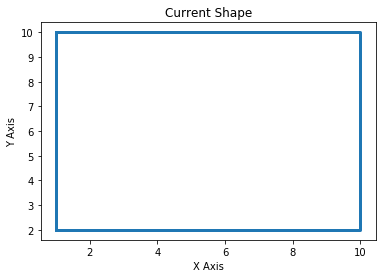

Is point (6,5) in shape J? True
Using Shape J (square), testing point (8,2) which is on the border (inclusive)
Is point (8,2) in shape J? True
Using shape J (square), testing point (11,3) which is outside to the right
Is point (11,3) in shape J? False
Using shape J (square), testing point (0,9) which is outsed to the left
Is point (0,9) in shape J? False
Using shape F (unclosed shape), testing point (5,4)


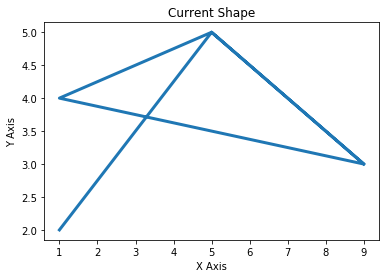

Point cannot be 'inside' a closed shape.
Is point (5,4) in shape F? False
Using shape G (regular triangle), testing point (6,3) which crosses through a vertex


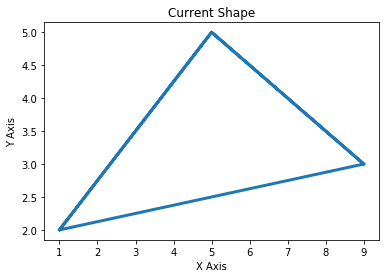

Is point (6,3) in shape G? True


In [77]:
print("Testing if a point is in a shape or not")
print("Using shape J (square), testing point (6,5)")
j.draw()
print(f"Is point (6,5) in shape J? {j.is_inside(Vector(6,5))}")
print("Using Shape J (square), testing point (8,2) which is on the border (inclusive)")
print(f"Is point (8,2) in shape J? {j.is_inside(Vector(8,2))}")
print("Using shape J (square), testing point (11,3) which is outside to the right")
print(f"Is point (11,3) in shape J? {j.is_inside(Vector(11,3))}")
print("Using shape J (square), testing point (0,9) which is outsed to the left")
print(f"Is point (0,9) in shape J? {j.is_inside(Vector(11,3))}")
print("Using shape F (unclosed shape), testing point (5,4)")
f.draw()
print(f"Is point (5,4) in shape F? {f.is_inside(Vector(5,4))}")
print("Using shape G (regular triangle), testing point (6,3) which crosses through a vertex")
g.draw()
print(f"Is point (6,3) in shape G? {g.is_inside(Vector(6,3))}")